# Data Analysis: COVID19 (Mexico)
Data Analyst Bootcamp 2020
/Author: Josue Cano
/Guadalajara, April 2020. 

### Data manipulation

In [728]:
# Import libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [729]:
# Read the file containing the data and assign it to: "data"
data = pd.read_csv('reporte_Mexico.csv', index_col = 0)

# Print the size of the data array
print(data.shape)

# Print a concise summary of the DataFrame
print(data.info())

(1378, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N° Caso      1378 non-null   int64 
 1   Estado       1378 non-null   object
 2   Sexo         1378 non-null   object
 3   Edad         1378 non-null   int64 
 4   Inicio de    1378 non-null   object
 5   por RT-PCR   1378 non-null   object
 6   Procedencia  1378 non-null   object
 7   llegada a    728 non-null    object
dtypes: int64(2), object(6)
memory usage: 64.6+ KB
None


In [730]:
# Rename each column in the array
data.rename(columns = {
    "N° Caso": "n_caso",
    "Estado": "estado",
    "Sexo": "sexo",
    "Edad": "edad",
    "Inicio de": "inicio",
    "por RT-PCR": "estatus",
    "Procedencia": "procedencia",
    "llegada a": "llegada_mexico"
}, inplace = True)

In [731]:
# Read the first six records
data.head(6)

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,22/02/2020,Confirmado,Italia,22/02/2020
1,2,SINALOA,M,41,22/02/2020,Confirmado,Italia,21/02/2020
2,3,CIUDAD DE MÉXICO,M,59,23/02/2020,Confirmado,Italia,22/02/2020
3,4,COAHUILA,F,20,27/02/2020,Confirmado,Italia,25/02/2020
4,5,CHIAPAS,F,18,25/02/2020,Confirmado,Italia,25/02/2020
5,6,MÉXICO,M,71,21/02/2020,Confirmado,Italia,21/02/2020


In [732]:
# Read the last five records
data.tail()

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
1373,1374,CIUDAD DE MÉXICO,F,54,25/03/2020,Confirmado,Contacto,NaN
1374,1375,NAYARIT,F,79,24/03/2020,Confirmado,Contacto,NaN
1375,1376,NUEVO LEÓN,F,46,28/03/2020,Confirmado,Contacto,NaN
1376,1377,PUEBLA,M,49,23/03/2020,Confirmado,Contacto,NaN
1377,1378,SAN LUIS POTOSÍ,F,41,27/03/2020,Confirmado,Estados Unidos,17/03/2020


In [733]:
# Determine non-useful records (with value for "llegada_mexico" outside parameters)
data[data["llegada_mexico"] == "Confirmado"]

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
89,90,YUCATÁN,M,21,13/03/2020,Confirmado,13/03/2020,Confirmado
377,378,JALISCO,M,19,16/03/2020,Confirmado,15/03/2020,Confirmado
473,474,HIDALGO,F,16,20/03/2020,Confirmado,13/03/2020,Confirmado
569,570,NAYARIT,F,32,10/03/2020,Confirmado,15/03/2020,Confirmado
617,618,MICHOACÁN,F,60,18/03/2020,Confirmado,17/03/2020,Confirmado
713,714,JALISCO,F,13,22/03/2020,Confirmado,20/03/2020,Confirmado
761,762,CIUDAD DE MÉXICO,F,20,14/03/2020,Confirmado,09/03/2020,Confirmado
857,858,CIUDAD DE MÉXICO,F,43,23/03/2020,Confirmado,24/03/2020,Confirmado
905,906,PUEBLA,M,45,21/03/2020,Confirmado,24/03/2020,Confirmado
953,954,MÉXICO,M,50,14/03/2020,Confirmado,15/03/2020,Confirmado


In [734]:
# Delete data with "Confirmado" value in "llegada_mexico"
data = data[data["llegada_mexico"] != "Confirmado"]
data

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,22/02/2020,Confirmado,Italia,22/02/2020
1,2,SINALOA,M,41,22/02/2020,Confirmado,Italia,21/02/2020
2,3,CIUDAD DE MÉXICO,M,59,23/02/2020,Confirmado,Italia,22/02/2020
3,4,COAHUILA,F,20,27/02/2020,Confirmado,Italia,25/02/2020
4,5,CHIAPAS,F,18,25/02/2020,Confirmado,Italia,25/02/2020
...,...,...,...,...,...,...,...,...
1373,1374,CIUDAD DE MÉXICO,F,54,25/03/2020,Confirmado,Contacto,NaN
1374,1375,NAYARIT,F,79,24/03/2020,Confirmado,Contacto,NaN
1375,1376,NUEVO LEÓN,F,46,28/03/2020,Confirmado,Contacto,NaN
1376,1377,PUEBLA,M,49,23/03/2020,Confirmado,Contacto,NaN


In [735]:
# Convert data type object of "inicio" to time format
data["inicio"] = pd.to_datetime(data["inicio"], dayfirst = True)


In [736]:
# Convert data type object of "llegada_mexico" to time format
data["llegada_mexico"] = pd.to_datetime(data["llegada_mexico"], dayfirst = True)

In [737]:
# View the first three records to appreciate the change in data type
data.head(3)

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22
1,2,SINALOA,M,41,2020-02-22,Confirmado,Italia,2020-02-21
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,Confirmado,Italia,2020-02-22


In [738]:
# Print a concise summary of the DataFrame to view the applied change
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1377
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_caso          1368 non-null   int64         
 1   estado          1368 non-null   object        
 2   sexo            1368 non-null   object        
 3   edad            1368 non-null   int64         
 4   inicio          1368 non-null   datetime64[ns]
 5   estatus         1368 non-null   object        
 6   procedencia     1368 non-null   object        
 7   llegada_mexico  718 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 74.8+ KB


In [739]:
# Date of the last update of the dataset
print('Last update: ' + str(data.llegada_mexico.max()))
data.llegada_mexico.max()

Last update: 2020-03-31 00:00:00


Timestamp('2020-03-31 00:00:00')

In [740]:
data

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22
1,2,SINALOA,M,41,2020-02-22,Confirmado,Italia,2020-02-21
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,Confirmado,Italia,2020-02-22
3,4,COAHUILA,F,20,2020-02-27,Confirmado,Italia,2020-02-25
4,5,CHIAPAS,F,18,2020-02-25,Confirmado,Italia,2020-02-25
...,...,...,...,...,...,...,...,...
1373,1374,CIUDAD DE MÉXICO,F,54,2020-03-25,Confirmado,Contacto,NaT
1374,1375,NAYARIT,F,79,2020-03-24,Confirmado,Contacto,NaT
1375,1376,NUEVO LEÓN,F,46,2020-03-28,Confirmado,Contacto,NaT
1376,1377,PUEBLA,M,49,2020-03-23,Confirmado,Contacto,NaT


In [741]:
# Show where the infected came from
data.procedencia.unique()

array(['Italia', 'Estados Unidos', 'España', 'Alemania', 'Contacto',
       'Francia', 'Singapur'], dtype=object)

In [742]:
# calculate the number of infected from Italy
italy = data[data['procedencia'] == 'Italia']
italyCount = italy['procedencia'].count()
print(italyCount)

21


In [743]:
# calculate the number of infected from Spain
spain = data[data['procedencia'] == 'España']
spainCount = spain['procedencia'].count()
print(spainCount)

246


In [744]:
# calculate the number of infected from France 
france = data[data['procedencia'] == 'Francia']
franceCount = france['procedencia'].count()
print(franceCount)

48


In [745]:
# calculate the number of infected from Germany
germany = data[data['procedencia'] == 'Alemania']
germanyCount = germany['procedencia'].count()
print(germanyCount)

12


In [746]:
# Show the ages of those infected
data.edad.unique()

array([35, 41, 59, 20, 18, 71, 46, 43, 30, 64, 57, 55, 58, 65, 42, 48, 38,
       31, 37, 52, 68, 53, 73, 33, 54, 61, 45, 62, 72, 25, 23, 27, 49, 50,
       66, 63, 32, 22, 70, 47, 39, 29, 19, 44, 74, 80, 56, 34, 21, 36, 24,
       75, 26, 28, 17, 79, 51,  0, 77, 40, 11, 60, 76, 12, 16, 10, 88, 67,
       69, 82,  5, 78, 81,  2,  3, 85, 15,  6,  8, 89, 13, 86,  7],
      dtype=int64)

In [747]:
# Show the states where the infected are
data.estado.unique()

array(['CIUDAD DE MÉXICO', 'SINALOA', 'COAHUILA', 'CHIAPAS', 'MÉXICO',
       'QUERETARO', 'NUEVO LEÓN', 'DURANGO', 'PUEBLA', 'YUCATÁN',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'JALISCO', 'OAXACA', 'GUERRERO',
       'AGUASCALIENTES', 'GUANAJUATO', 'CHIHUAHUA', 'TAMAULIPAS',
       'SONORA', 'VERACRUZ', 'COLIMA', 'BAJA CALIFORNIA', 'HIDALGO',
       'TABASCO', 'MORELOS', 'NAYARIT', 'ZACATECAS',
       'BAJA CALIFORNIA SUR', 'MICHOACÁN', 'CAMPECHE', 'TLAXCALA'],
      dtype=object)

In [748]:
# Visualize the sex of those infected
data.sexo.unique()

array(['M', 'F'], dtype=object)

In [749]:
# Calculate the number of infected women
women = data[data["sexo"] == "F"]
numberWomen = women.sexo.count() 
print(numberWomen)


576


In [750]:
# Calculate the number of infected men
men = data[data["sexo"] == "M"]
numberMen = men.sexo.count() 
print(numberMen)

792


In [751]:
# Visualize the "estatus" of people
data.estatus.unique()

array(['Confirmado'], dtype=object)

In [752]:
# Print the size of the data array
data.shape

(1368, 8)

### Creating DataFrames

In [753]:
# Jalisco DataFrame creation
Jalisco = data[data['estado'] == 'JALISCO']
Jalisco.head()

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
31,32,JALISCO,F,54,2020-03-10,Confirmado,España,2020-03-04
32,33,JALISCO,F,64,2020-03-01,Confirmado,Alemania,2020-03-09
95,96,JALISCO,M,49,2020-03-06,Confirmado,España,2020-03-04
96,97,JALISCO,M,41,2020-03-10,Confirmado,Estados Unidos,2020-02-29
97,98,JALISCO,F,56,2020-03-11,Confirmado,Contacto,NaT


In [754]:
# Nuevo León DataFrame creation
nuevoLeon = data[data['estado'] == 'NUEVO LEÓN']
nuevoLeon.head()

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
11,12,NUEVO LEÓN,M,57,2020-03-04,Confirmado,Alemania,2020-03-03
27,28,NUEVO LEÓN,M,73,2020-03-09,Confirmado,Estados Unidos,2020-03-10
28,29,NUEVO LEÓN,M,30,2020-03-09,Confirmado,España,2020-03-07
46,47,NUEVO LEÓN,M,27,2020-03-11,Confirmado,España,2020-03-13
47,48,NUEVO LEÓN,M,46,2020-03-06,Confirmado,Estados Unidos,2020-03-03


In [755]:
# Ciudad de México DataFrame creation
ciudadMexico = data[data['estado'] == 'CIUDAD DE MÉXICO']
ciudadMexico.head()

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,Confirmado,Italia,2020-02-22
6,7,CIUDAD DE MÉXICO,M,46,2020-02-29,Confirmado,Estados Unidos,2020-02-29
8,9,CIUDAD DE MÉXICO,M,41,2020-03-07,Confirmado,Estados Unidos,2020-03-06
9,10,CIUDAD DE MÉXICO,F,30,2020-03-07,Confirmado,España,2020-03-06


In [756]:
# Display start date in CDMX
ciudadMexico.inicio.unique()

array(['2020-02-22T00:00:00.000000000', '2020-02-23T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-04T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-12T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-15T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-18T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-25T00:00:00.000000000', '2020-03-24T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-26

In [757]:
# Create a vector with start date values
vectorDates = ciudadMexico.inicio.unique()
print (vectorDates)

['2020-02-22T00:00:00.000000000' '2020-02-23T00:00:00.000000000'
 '2020-02-29T00:00:00.000000000' '2020-03-07T00:00:00.000000000'
 '2020-03-10T00:00:00.000000000' '2020-03-11T00:00:00.000000000'
 '2020-03-08T00:00:00.000000000' '2020-03-04T00:00:00.000000000'
 '2020-03-09T00:00:00.000000000' '2020-03-13T00:00:00.000000000'
 '2020-03-06T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-14T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-15T00:00:00.000000000'
 '2020-03-03T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-20T00:00:00.000000000' '2020-03-19T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-02T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-27T00:00:00.000

In [758]:
# Create a vector of zeros for CDMX frequencies
vectorCdmx = np.zeros(31)

In [759]:
date1 = ciudadMexico[ciudadMexico["inicio"] == "2020-02-22T00:00:00.000000000"]
numberDate1 = date1.inicio.count() 
vectorCdmx[0] = numberDate1
print(numberDate1)

1


In [760]:
date2 = ciudadMexico[ciudadMexico["inicio"] == "2020-02-23T00:00:00.000000000"]
numberDate2 = date2.inicio.count() 
vectorCdmx[1] = numberDate2
print(numberDate2)

1


In [761]:
date3 = ciudadMexico[ciudadMexico["inicio"] == "2020-02-29T00:00:00.000000000"]
numberDate3 = date3.inicio.count() 
vectorCdmx[2] = numberDate3
print(numberDate3)

1


In [762]:
date4 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-07T00:00:00.000000000"]
numberDate4 = date4.inicio.count() 
vectorCdmx[3] = numberDate4
print(numberDate4)

7


In [763]:
date5 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-10T00:00:00.000000000"]
numberDate5 = date5.inicio.count() 
vectorCdmx[4] = numberDate5
print(numberDate5)

17


In [764]:
date6 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-11T00:00:00.000000000"]
numberDate6 = date6.inicio.count() 
vectorCdmx[5] = numberDate6
print(numberDate6)

13


In [765]:
date7 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-08T00:00:00.000000000"]
numberDate7 = date7.inicio.count() 
vectorCdmx[6] = numberDate7
print(numberDate7)

5


In [766]:
date8 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-04T00:00:00.000000000"]
numberDate8 = date8.inicio.count() 
vectorCdmx[7] = numberDate8
print(numberDate8)

2


In [767]:
date9 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-09T00:00:00.000000000"]
numberDate9 = date9.inicio.count() 
vectorCdmx[8] = numberDate9
print(numberDate9)

17


In [768]:
date10 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-13T00:00:00.000000000"]
numberDate10 = date10.inicio.count() 
vectorCdmx[9] = numberDate10
print(numberDate10)

18


In [769]:
date11 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-06T00:00:00.000000000"]
numberDate11 = date11.inicio.count() 
vectorCdmx[10] = numberDate11
print(numberDate11)

3


In [770]:
date12 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-12T00:00:00.000000000"]
numberDate12 = date12.inicio.count() 
vectorCdmx[11] = numberDate12
print(numberDate12)

9


In [771]:
date13 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-14T00:00:00.000000000"]
numberDate13 = date13.inicio.count() 
vectorCdmx[12] = numberDate13
print(numberDate13)

23


In [772]:
date14 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-16T00:00:00.000000000"]
numberDate14 = date14.inicio.count() 
vectorCdmx[13] = numberDate14
print(numberDate14)

24


In [773]:
date15 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-17T00:00:00.000000000"]
numberDate15 = date15.inicio.count() 
vectorCdmx[14] = numberDate15
print(numberDate15)

19


In [774]:
date16 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-15T00:00:00.000000000"]
numberDate16 = date16.inicio.count() 
vectorCdmx[15] = numberDate16
print(numberDate16)

19


In [775]:
date17 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-03T00:00:00.000000000"]
numberDate17 = date17.inicio.count() 
vectorCdmx[16] = numberDate17
print(numberDate17)

1


In [776]:
date18 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-18T00:00:00.000000000"]
numberDate18 = date18.inicio.count() 
vectorCdmx[17] = numberDate18
print(numberDate18)

16


In [777]:
date19 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-20T00:00:00.000000000"]
numberDate19 = date19.inicio.count() 
vectorCdmx[18] = numberDate19
print(numberDate19)

17


In [778]:
date20 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-19T00:00:00.000000000"]
numberDate20 = date20.inicio.count() 
vectorCdmx[19] = numberDate20
print(numberDate20)

21


In [779]:
date21 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-21T00:00:00.000000000"]
numberDate21 = date21.inicio.count() 
vectorCdmx[20] = numberDate21
print(numberDate21)

9


In [780]:
date22 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-02T00:00:00.000000000"]
numberDate22 = date22.inicio.count() 
vectorCdmx[21] = numberDate22
print(numberDate22)

1


In [781]:
date23 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-01T00:00:00.000000000"]
numberDate23 = date23.inicio.count() 
vectorCdmx[22] = numberDate23
print(numberDate23)

1


In [782]:
date24 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-22T00:00:00.000000000"]
numberDate24 = date24.inicio.count() 
vectorCdmx[23] = numberDate24
print(numberDate24)

7


In [783]:
date25 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-25T00:00:00.000000000"]
numberDate25 = date25.inicio.count() 
vectorCdmx[24] = numberDate25
print(numberDate25)

10


In [784]:
date26 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-24T00:00:00.000000000"]
numberDate26 = date26.inicio.count() 
vectorCdmx[25] = numberDate26
print(numberDate26)

10


In [785]:
date27 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-23T00:00:00.000000000"]
numberDate27 = date27.inicio.count() 
vectorCdmx[26] = numberDate27
print(numberDate27)

6


In [786]:
date28 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-26T00:00:00.000000000"]
numberDate28 = date28.inicio.count() 
vectorCdmx[27] = numberDate28
print(numberDate28)

8


In [787]:
date29 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-17T00:00:00.000000000"]
numberDate29 = date29.inicio.count() 
vectorCdmx[28] = numberDate29
print(numberDate29)

19


In [788]:
date30 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-28T00:00:00.000000000"]
numberDate30 = date30.inicio.count() 
vectorCdmx[29] = numberDate30
print(numberDate30)

1


In [789]:
date31 = ciudadMexico[ciudadMexico["inicio"] == "2020-03-27T00:00:00.000000000"]
numberDate31 = date31.inicio.count() 
vectorCdmx[30] = numberDate31
print(numberDate31)

5


In [790]:
# Display the frequency vector
print(vectorCdmx)

[ 1.  1.  1.  7. 17. 13.  5.  2. 17. 18.  3.  9. 23. 24. 19. 19.  1. 16.
 17. 21.  9.  1.  1.  7. 10. 10.  6.  8. 19.  1.  5.]


In [791]:
# Coahuila DataFrame creation 
Coahuila = data[data['estado'] == 'COAHUILA']
Coahuila.head()

,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
3,4,COAHUILA,F,20,2020-02-27,Confirmado,Italia,2020-02-25
282,283,COAHUILA,F,41,2020-03-18,Confirmado,España,2020-03-14
286,287,COAHUILA,M,29,2020-03-17,Confirmado,Estados Unidos,2020-03-15
318,319,COAHUILA,M,43,2020-03-16,Confirmado,Estados Unidos,2020-03-13
329,330,COAHUILA,M,42,2020-03-18,Confirmado,Estados Unidos,2020-03-11


### Data cleaning

In [792]:
# Initialize the Numpy matrix with NaN values for those who acquired the virus by contagion
datos_Procedencia_raros = ['Contacto',
        '13/03/2020', '15/03/2020', '17/03/2020',
        '20/03/2020', '09/03/2020', '24/03/2020']
data["procedencia"][data.procedencia.isin(datos_Procedencia_raros)] = np.nan
data

<ipython-input-792-0bf9ce2c0801>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22
1,2,SINALOA,M,41,2020-02-22,Confirmado,Italia,2020-02-21
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,Confirmado,Italia,2020-02-22
3,4,COAHUILA,F,20,2020-02-27,Confirmado,Italia,2020-02-25
4,5,CHIAPAS,F,18,2020-02-25,Confirmado,Italia,2020-02-25
...,...,...,...,...,...,...,...,...
1373,1374,CIUDAD DE MÉXICO,F,54,2020-03-25,Confirmado,NaN,NaT
1374,1375,NAYARIT,F,79,2020-03-24,Confirmado,NaN,NaT
1375,1376,NUEVO LEÓN,F,46,2020-03-28,Confirmado,NaN,NaT
1376,1377,PUEBLA,M,49,2020-03-23,Confirmado,NaN,NaT


In [793]:
# Calculate the number of infected within Mexico
contagiados = data.procedencia.isnull().sum()
print(contagiados)

766


In [794]:
# Calculate the number of infected abroad
extranjero = data.procedencia.count()
print(extranjero)

602


In [795]:
# Determine the number of null values
data.isnull().sum()

n_caso              0
estado              0
sexo                0
edad                0
inicio              0
estatus             0
procedencia       766
llegada_mexico    650
dtype: int64

In [796]:
# Calculate the percentage of null values
data.isnull().sum()/data.shape[1]

n_caso             0.00
estado             0.00
sexo               0.00
edad               0.00
inicio             0.00
estatus            0.00
procedencia       95.75
llegada_mexico    81.25
dtype: float64

In [797]:
# Change the null values of "procedencia" to the values of "estado"
data['procedencia'].fillna(data['estado'], inplace = True)

In [798]:
# Verify that the change of values has been made
data.isnull().sum()

n_caso              0
estado              0
sexo                0
edad                0
inicio              0
estatus             0
procedencia         0
llegada_mexico    650
dtype: int64

In [799]:
# Change the null values of "llegada_mexico" to the values of "inicio"
data['llegada_mexico'].fillna(data['inicio'], inplace = True)

In [800]:
# Verify that the change of values has been made
data.isnull().sum()

n_caso            0
estado            0
sexo              0
edad              0
inicio            0
estatus           0
procedencia       0
llegada_mexico    0
dtype: int64

In [801]:
# Sort the values by confirmed cases
data = data.sort_values(['inicio','estado'])

data['first_date'] = data.groupby('estado')['inicio'].transform('min')
data['days'] = (data['inicio'] - data['first_date']).dt.days

data.head(9)


,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico,first_date,days
1150,1151,CIUDAD DE MÉXICO,M,41,2020-02-17,Confirmado,CIUDAD DE MÉXICO,2020-02-17,2020-02-17,0
316,317,MÉXICO,M,44,2020-02-19,Confirmado,Italia,2020-02-22,2020-02-19,0
791,792,YUCATÁN,F,37,2020-02-19,Confirmado,YUCATÁN,2020-01-21,2020-02-19,0
5,6,MÉXICO,M,71,2020-02-21,Confirmado,Italia,2020-02-21,2020-02-19,2
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22,2020-02-17,5
1,2,SINALOA,M,41,2020-02-22,Confirmado,Italia,2020-02-21,2020-02-22,0
1168,1169,CAMPECHE,F,60,2020-02-23,Confirmado,CAMPECHE,2020-02-23,2020-02-23,0
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,Confirmado,Italia,2020-02-22,2020-02-17,6
4,5,CHIAPAS,F,18,2020-02-25,Confirmado,Italia,2020-02-25,2020-02-25,0


In [802]:
# Exploring the data: use numerical values rows (first seven records)
data.iloc[0:7]


,n_caso,estado,sexo,edad,inicio,estatus,procedencia,llegada_mexico,first_date,days
1150,1151,CIUDAD DE MÉXICO,M,41,2020-02-17,Confirmado,CIUDAD DE MÉXICO,2020-02-17,2020-02-17,0
316,317,MÉXICO,M,44,2020-02-19,Confirmado,Italia,2020-02-22,2020-02-19,0
791,792,YUCATÁN,F,37,2020-02-19,Confirmado,YUCATÁN,2020-01-21,2020-02-19,0
5,6,MÉXICO,M,71,2020-02-21,Confirmado,Italia,2020-02-21,2020-02-19,2
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,Confirmado,Italia,2020-02-22,2020-02-17,5
1,2,SINALOA,M,41,2020-02-22,Confirmado,Italia,2020-02-21,2020-02-22,0
1168,1169,CAMPECHE,F,60,2020-02-23,Confirmado,CAMPECHE,2020-02-23,2020-02-23,0


In [803]:
# Exploring the data: returns the row-column intersection
data.iloc[4,5] 


'Confirmado'

In [804]:
# Exploring the data: returns an array
data.iloc[12:39,1:5]  


,estado,sexo,edad,inicio
32,JALISCO,F,64,2020-03-01
686,JALISCO,F,50,2020-03-01
25,QUINTANA ROO,F,71,2020-03-01
479,CIUDAD DE MÉXICO,M,28,2020-03-02
10,MÉXICO,F,64,2020-03-02
630,MÉXICO,F,49,2020-03-02
84,NUEVO LEÓN,M,42,2020-03-02
782,QUINTANA ROO,M,35,2020-03-02
257,CIUDAD DE MÉXICO,F,31,2020-03-03
210,MÉXICO,M,31,2020-03-03


### Graphical display of results

Text(0, 0.5, 'Frecuency')

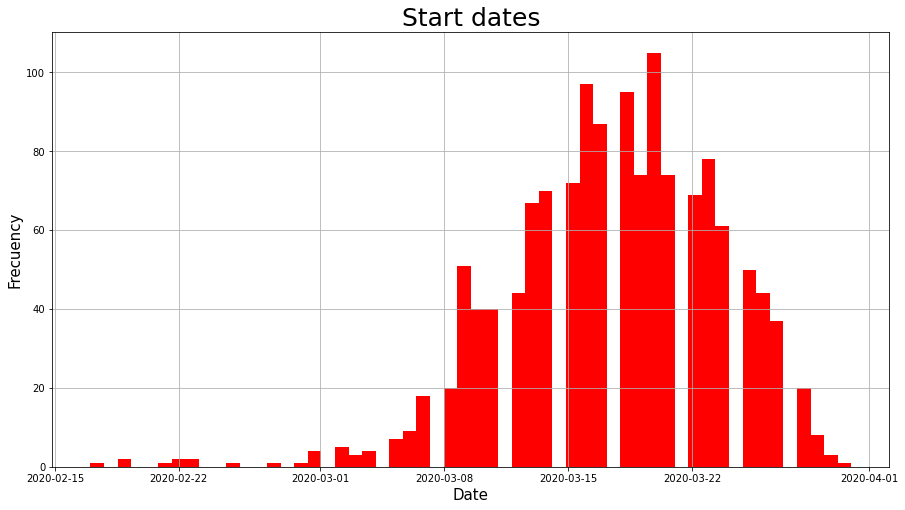

In [805]:
# Display a histogram with start dates 
data.inicio.hist(figsize = (15, 8), color='red', bins=56);
plt.title('Start dates', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Frecuency',  fontsize=15)

Text(0.5, 1.0, 'Contagions in Mexico and abroad')

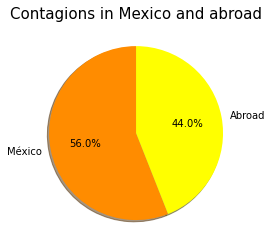

In [806]:
# Contagions in Mexico and abroad
divisions= [contagiados, extranjero]
explain = ['México','Abroad']
colores = ['darkorange','yellow']
plt.pie(divisions, labels=explain, colors=colores, startangle=90, shadow=True, autopct='%1.1f%%')
plt.title('Contagions in Mexico and abroad', fontsize=15)


Text(0, 0.5, 'Frecuency')

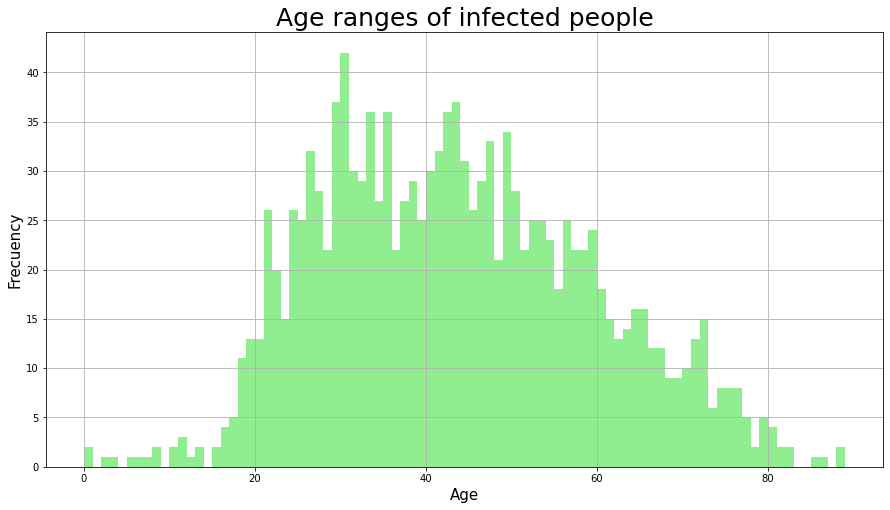

In [807]:
# Display a histogram with age ranges
plt.title('Age ranges of infected people', fontsize=25)
data.edad.hist(figsize =(15, 8), color='lightgreen', bins=89)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frecuency',  fontsize=15)

Text(0.5, 1.0, 'Percentaje of men and women infected in Mexico')

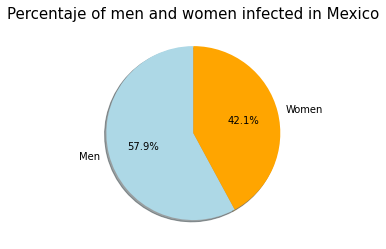

In [808]:
# Number of infected men and women 
divisions= [numberMen, numberWomen]
explain = ['Men','Women']
colores = ['lightblue','orange']
plt.pie(divisions, labels=explain, colors=colores, startangle=90, shadow=True, autopct='%1.1f%%')
plt.title('Percentaje of men and women infected in Mexico', fontsize=15)



Text(0.5, 1.0, 'Infected from Europe')

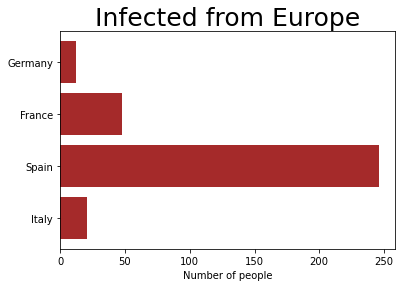

In [809]:
# Provenance of European countries
paises = ("Italy", "Spain", "France", "Germany")
posicion_y = np.arange(len(paises))

unidades = (italyCount, spainCount, franceCount, germanyCount)

plt.barh(posicion_y, unidades, align = "center", color='brown')
plt.yticks(posicion_y, paises)
plt.xlabel('Number of people', fontsize=10)
plt.title("Infected from Europe", fontsize=25)


Text(0, 0.5, 'Confirmed cases')

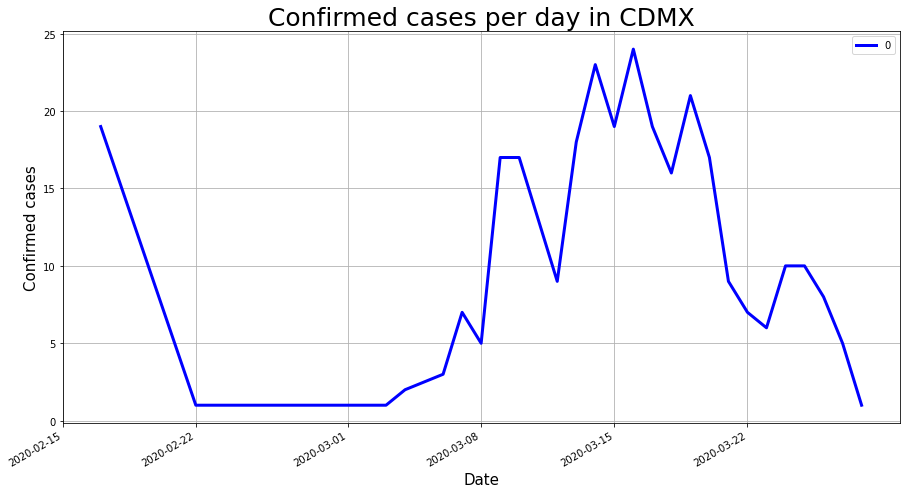

In [810]:
# Confirmed cases per day in CDMX
graphicCdmx = pd.DataFrame(vectorCdmx, vectorDates)
graphicCdmx.plot(color="blue", linewidth=3, figsize =(15, 8))
plt.grid()
plt.title("Confirmed cases per day in CDMX", fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Confirmed cases',  fontsize=15)

### National visualization of the pandemic

In [811]:
# Read data from .csv file
estados = pd.read_csv("estado_cord.csv", index_col = 0)
# Visualize the data matrix
estados

,estado,lat,lon,capital
0,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN
1,SINALOA,24.805213,-107.396538,CULIACAN
2,COAHUILA,27.177668,-101.876190,SALTILLO
3,CHIAPAS,16.756774,-93.139526,TUXTLA GUTIERREZ
4,MÉXICO,19.385644,-99.674101,TOLUCA
5,QUERETARO,20.606296,-100.396495,QUERETARO
6,NUEVO LEÓN,25.523678,-99.866745,MONTERREY
7,DURANGO,24.698052,-104.837389,DURANGO
8,PUEBLA,18.827949,-97.911607,PUEBLA
9,YUCATÁN,20.756426,-88.976256,MERIDA


In [812]:
# Combine matrices: "estado" matrix and the initial matrix
data = pd.merge(estados, data, on = ["estado"], how = "right")
data

,estado,lat,lon,capital,n_caso,sexo,edad,inicio,estatus,procedencia,llegada_mexico,first_date,days
0,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN,1151,M,41,2020-02-17,Confirmado,CIUDAD DE MÉXICO,2020-02-17,2020-02-17,0
1,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN,1,M,35,2020-02-22,Confirmado,Italia,2020-02-22,2020-02-17,5
2,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN,3,M,59,2020-02-23,Confirmado,Italia,2020-02-22,2020-02-17,6
3,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN,7,M,46,2020-02-29,Confirmado,Estados Unidos,2020-02-29,2020-02-17,12
4,CIUDAD DE MÉXICO,19.401530,-99.135415,NaN,674,F,50,2020-03-01,Confirmado,Estados Unidos,2020-03-08,2020-02-17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,TLAXCALA,19.377285,-98.173120,TLAXCALA,495,F,19,2020-03-16,Confirmado,Estados Unidos,2020-03-21,2020-03-16,0
1364,TLAXCALA,19.377285,-98.173120,TLAXCALA,598,M,38,2020-03-16,Confirmado,TLAXCALA,2020-03-16,2020-03-16,0
1365,TLAXCALA,19.377285,-98.173120,TLAXCALA,619,M,45,2020-03-17,Confirmado,TLAXCALA,2020-03-17,2020-03-16,1
1366,TLAXCALA,19.377285,-98.173120,TLAXCALA,629,M,56,2020-03-22,Confirmado,Estados Unidos,2020-03-21,2020-03-16,6


In [813]:
# Create a matrix that allows graphing the map (state, geographic coordinates and confirmed cases)
datos_mapa = data.groupby(["estado", "lat", "lon"]).agg({
    "estatus":"size"
}).reset_index()
datos_mapa.head()

,estado,lat,lon,estatus
0,AGUASCALIENTES,21.877392,-102.278264,36
1,BAJA CALIFORNIA,30.163889,-115.271327,37
2,BAJA CALIFORNIA SUR,26.229542,-111.936810,18
3,CAMPECHE,18.918481,-90.171292,5
4,CHIAPAS,16.756774,-93.139526,14


Text(0.5, 1.0, "Main Mexico's cities")

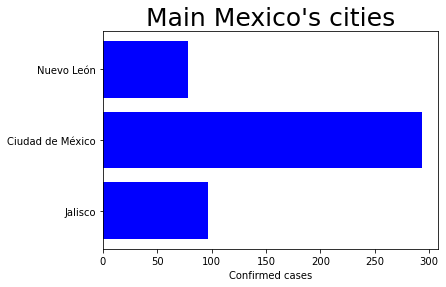

In [814]:
# Display a histogram with the main cities
estados = ("Jalisco", "Ciudad de México", "Nuevo León")
posicion_y = np.arange(len(estados))

jal = datos_mapa[datos_mapa['estado'] == 'JALISCO']
jalNum = jal.iloc[0,3]
cdmx = datos_mapa[datos_mapa['estado'] == 'CIUDAD DE MÉXICO']
cdmxNum = cdmx.iloc[0,3]
nl = datos_mapa[datos_mapa['estado'] == 'NUEVO LEÓN']
nlNum = nl.iloc[0,3]
unidades = (jalNum, cdmxNum, nlNum)

plt.barh(posicion_y, unidades, align = "center", color='blue')
plt.yticks(posicion_y, estados)
plt.xlabel('Confirmed cases', fontsize=10)
plt.title("Main Mexico's cities", fontsize=25)


In [815]:
# Graph the map of Mexico
import plotly.express as px
px.set_mapbox_access_token("12")
fig = px.scatter_mapbox(datos_mapa, lat = "lat", lon = "lon", hover_name = "estado",
                       color_discrete_sequence=["red"], zoom=3, size = "estatus", height = 300)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0, "t":0, "l":0, "b":0})
fig.show()